In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import matplotlib.pyplot as plt
import tifffile
import numpy as np

In [32]:
def show_prediction(image_path, masks):
    image = tifffile.imread(image_path)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Image')

    plt.subplot(1,2,2)
    plt.imshow(np.squeeze(masks), cmap='jet')
    plt.axis('off')
    plt.title('Prediction')

## Show how to use Cellpose

In [5]:
import cellpose_segmentation as cp

masks_cp = cp.predict('cyto3', 'MAX_registered-0008.tif', channels=[1,0], diameter=35)
print(masks_cp.shape)


: 

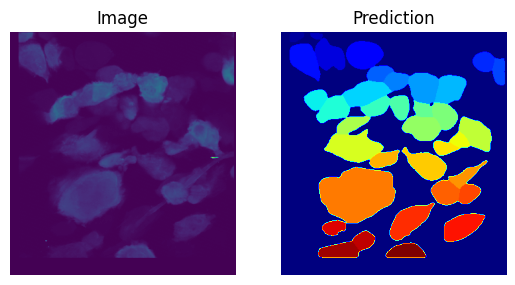

In [ ]:
show_prediction('MAX_registered-0008.tif', masks_cp)

## Show how to use StarDist

In [3]:
import stardist_segmentation as sd

masks_sd = sd.predict('2D_versatile_he', 'TCGA-18-5592-01Z-00-DX1.tif')
print(masks_sd.shape)

KeyboardInterrupt: 

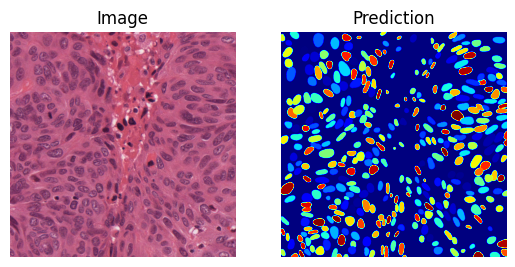

In [4]:
show_prediction('TCGA-18-5592-01Z-00-DX1.tif', masks_sd)

## Show how to use DeepCell

In [3]:
import deepcell_segmentation as dc

masks_dc = dc.predict('CytoplasmSegmentation', 'MAX_registered-0008.tif', image_mpp=.492)
print(masks_dc.shape)

2024-04-18 15:39:57.328573: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1, 368, 341, 1)


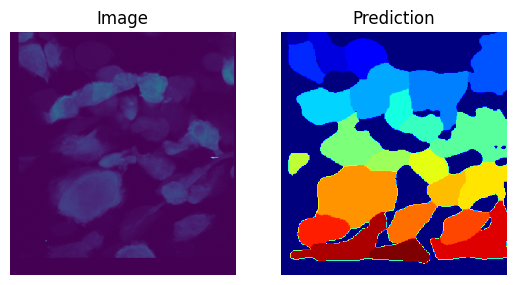

In [4]:
show_prediction('MAX_registered-0008.tif', masks_dc)

## Display testing functionality

In [33]:
def show_metrics(ious, metrics):
    ious = ious
    metric_breakdown = {
        'True Positives': metrics[1],
        'False Positives': metrics[2],
        'False Negatives': metrics[3]
    }

    x = np.arange(len(ious))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, axs = plt.subplots(ncols=2, figsize=(10,5) , layout='constrained')
    
    axs[0].plot(ious, metrics[0], '.-', lw=2)
    axs[0].set_title('Average Precisions')
    axs[0].set_xlabel('IOU Thresh')

    for name, value in metric_breakdown.items():
        offset = width * multiplier
        rects = axs[1].bar(x + offset, value, width, label=name)
        axs[1].bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[1].set_ylabel('Count')
    axs[1].set_title('Metrics')
    axs[1].set_xticks(x + width, ious)
    axs[1].legend(loc='upper left', ncols=4)

    plt.show()

### Load splice of test data from TissueNet

In [34]:
test_data = np.load(rf"C:\Users\aarus\.deepcell\datasets\tissuenet_v1-1\test.npz")
print(test_data)
X_test = test_data['X'][0:100]
y_test = test_data['y'][0:100]

Test Cellpose evaluation

In [35]:
import cellpose_segmentation as cp

masks = [cp.predict('tissuenet_cp3', x, channels=[2,1], flow_threshold=0.8) for x in X_test]
predictions = np.array(masks)

INFO:cellpose.models:>> tissuenet_cp3 << model set to be used
INFO:cellpose.core:>>>> using CPU
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:>> tissuenet_cp3 << model set to be used
INFO:cellpose.core:>>>> using CPU
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:>> tissuenet_cp3 << model set to be used
INFO:cellpose.core:>>>> using CPU
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:>> tissuenet_cp3 << model set to be used
INFO:cellpose.core:>>>> using CPU
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:>> tissuenet_cp3 << model set to be used
INFO:cellpose.core:>>>> using CPU
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:>> tissuenet_c

In [27]:
print(y_test.shape)
print(predictions.shape)

(100, 256, 256, 2)
(100, 256, 256)


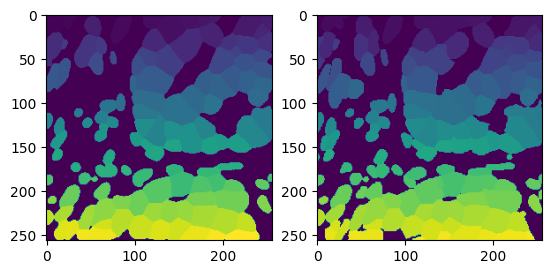

In [8]:
plt.subplot(1,2,1)
plt.imshow(masks[65])
plt.subplot(1,2,2)
plt.imshow(y_test[65,...,0])

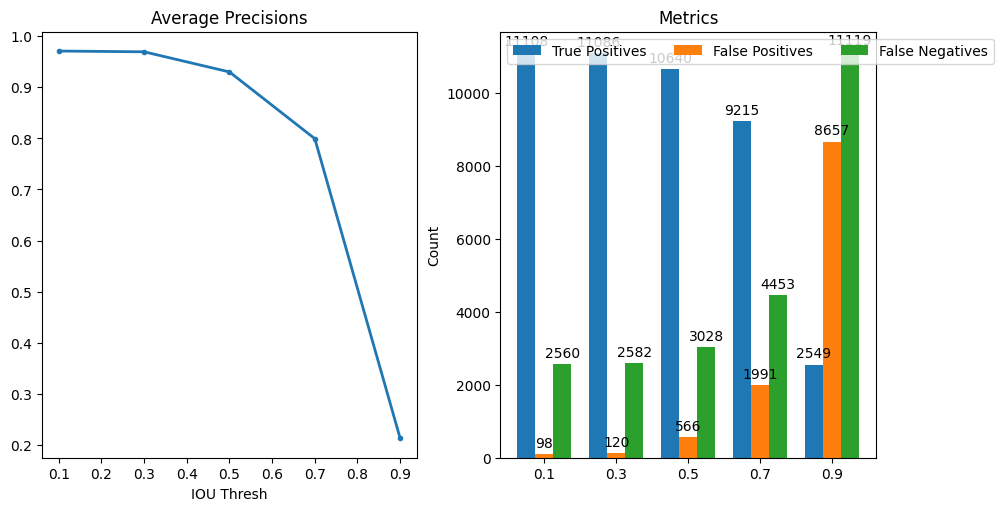

In [39]:
metrics = cp.evaluate(y_test[...,0], predictions, ious=[0.1, 0.3, 0.5, 0.7, 0.9])
show_metrics(ious=[0.1, 0.3, 0.5, 0.7, 0.9], metrics=metrics)

# metrics = cp.evaluate(np.expand_dims(y_test[0,...,0], 0), np.expand_dims(predictions[0], 0), ious=[0.1])
# show_metrics(ious=[0.1], metrics=metrics)

### Test with StarDist

In [42]:
import stardist_segmentation as sd
masks = [sd.predict('2D_versatile_fluo', x[...,0]) for x in X_test]
predictions = np.array(masks)

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=

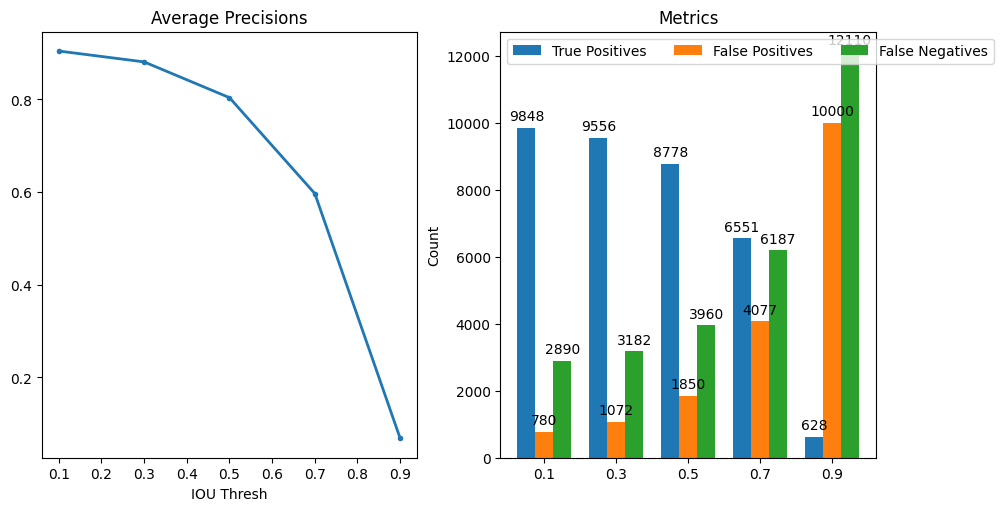

In [43]:
metrics = sd.evaluate(y_test[...,1], predictions, ious=[0.1, 0.3, 0.5, 0.7, 0.9])
show_metrics(ious=[0.1, 0.3, 0.5, 0.7, 0.9], metrics=metrics)

In [44]:
import deepcell_segmentation as dc

masks_dc = dc.predict('Mesmer', X_test, image_mpp=.492, compartment='whole-cell')

INFO:root:Checking for cached data
INFO:root:Checking MultiplexSegmentation-9.tar.gz against provided file_hash...
INFO:root:MultiplexSegmentation-9.tar.gz with hash a1dfbce2594f927b9112f23a0a1739e0 already available.
INFO:root:Extracting C:\Users\aarus\.deepcell\models\MultiplexSegmentation-9.tar.gz
INFO:root:Successfully extracted C:\Users\aarus\.deepcell\models\MultiplexSegmentation-9.tar.gz into C:\Users\aarus\.deepcell\models


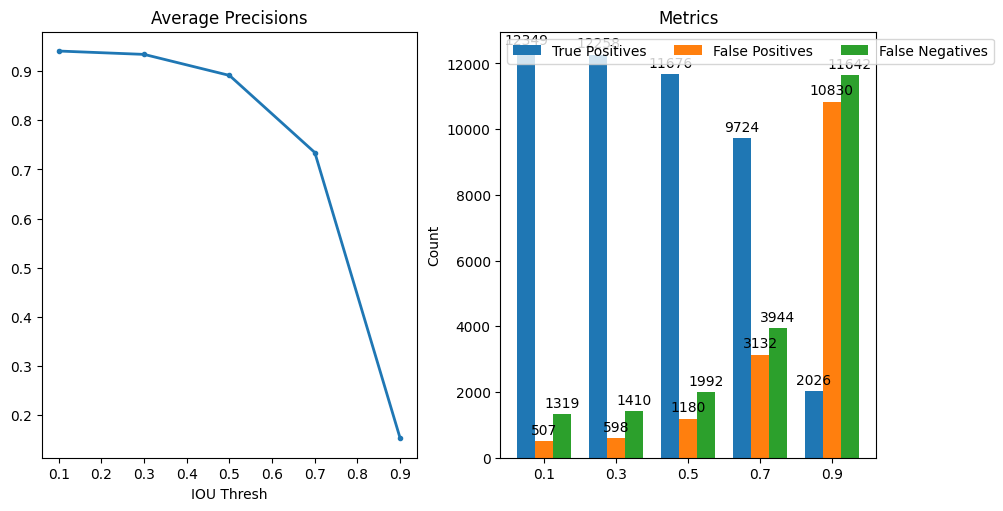

In [46]:
metrics = dc.evaluate(y_test[...,0], masks_dc[...,0], ious=[0.1, 0.3, 0.5, 0.7, 0.9])
show_metrics(ious=[0.1, 0.3, 0.5, 0.7, 0.9], metrics=metrics)